In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

# A bout the data :
We make scraping the data from the Aribnb web site from suadi the data have sevene columns :
- url: the url of the items that have all the data 
- name: the name of department
- header: the loaction of the place
- beds: the numbers of the beds in the departments
- bedrooms : the numbers of the rooms in departments
- date_range: how many day you will be stay in the departments
- price:  the price of staying in  the department
- rating: the rating of the people a bout the place 

**import libraries**

**Read csv file** 

In [2]:
data = pd.read_csv("/kaggle/input/suida-arabia/suadi_homes (3).csv")

**Show the five first rows in the data**

In [3]:
data.head()

,url,name,header,beds,bedrooms,date_range,price,rating
0,/rooms/848454289694032688?adults=4&category_ta...,Saleh's Cottage Saleh Cottage,Cabin in Samha,Saleh's Cottage Saleh Cottage,"6 beds, · 2 bedrooms",Nov 12 – 17,$266,NaN
1,/rooms/909897785656634809?adults=4&category_ta...,Cypress cottage,Hut in Tabab,Cypress cottage,"3 beds, · 2 bedrooms",May 1 – 6,"$1,066",NaN
2,/rooms/998608123216787130?adults=4&category_ta...,Qishla,Apartment in Riyadh,Qishla,"2 beds, · 2 bedrooms",Dec 15 – 20,$162,5.0 (3)
3,/rooms/53641292?adults=4&category_tag=Tag%3A67...,Exhibitor NeighborhoodThe Green (Self-entry),Chalet in Riyadh,Exhibitor NeighborhoodThe Green (Self-entry),Verified fast wifi,Nov 12 – 17,$205,4.86 (177)
4,/rooms/674270986363639521?adults=4&category_ta...,Mabaat - Al Narjis - 424,Apartment in Riyadh,Mabaat - Al Narjis - 424,"3 beds, · 2 bedrooms",Nov 12 – 17,$244,4.28 (40)


**Show how many missing values in the columns** 

In [4]:
data.isnull().sum()

url             0
name            0
header          0
beds            0
bedrooms        0
date_range      0
price         854
rating         46
dtype: int64

**Drop all the none value in the rows**

In [5]:
data.dropna(inplace=True)

**Get some information a bout the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2702 entries, 2 to 3599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         2702 non-null   object
 1   name        2702 non-null   object
 2   header      2702 non-null   object
 3   beds        2702 non-null   object
 4   bedrooms    2702 non-null   object
 5   date_range  2702 non-null   object
 6   price       2702 non-null   object
 7   rating      2702 non-null   object
dtypes: object(8)
memory usage: 190.0+ KB


**Get some Statstics information**

In [7]:
data.describe()

,url,name,header,beds,bedrooms,date_range,price,rating
count,2702,2702,2702,2702,2702,2702,2702,2702
unique,2702,261,42,261,25,32,150,138
top,/rooms/998608123216787130?adults=4&category_ta...,Cordoba Apartment 2/A,Apartment in Riyadh,Cordoba Apartment 2/A,"3 beds, · 2 bedrooms",Nov 12 – 17,$80,New
freq,1,182,1147,182,1156,1000,202,550


**Here we can extract new features from bedrooms column the first numbers of the beds and the second the numbers of the rooms and others featrues** 

In [8]:
# Extract number of beds and number of bedrooms
data[['num_beds', 'num_bedrooms']] = data['bedrooms'].str.extract('(\d+) beds.*?(\d+) bedrooms').fillna(1)

# print(counts)


**Show the the most freqency numbers of beds and bedrooms the most number is 3 for beds and 2 for the bedrooms**

In [9]:
data[['num_beds', 'num_bedrooms']].value_counts()

num_beds  num_bedrooms
3         2               1156
1         1                475
5         4                255
8         3                220
5         3                202
4         2                192
2         2                132
4         3                 26
3         3                 20
6         2                  8
          3                  8
5         2                  3
20        2                  1
5         5                  1
6         4                  1
7         4                  1
8         2                  1
Name: count, dtype: int64

**Fix the price values and delete the Doller sign and convert it to float type** 

In [10]:
data['price']

2       $162
3       $205
4       $244
5       $155
7       $176
        ... 
3592    $139
3594    $111
3595     $91
3598    $133
3599    $173
Name: price, Length: 2702, dtype: object

In [11]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

**This column has to value the first number represent the rating of place and the second represent the numbers of commints** 

In [12]:
data['rating']

2          5.0 (3)
3       4.86 (177)
4        4.28 (40)
5              New
7        4.93 (67)
           ...    
3592       5.0 (3)
3594       5.0 (4)
3595      5.0 (11)
3598     4.81 (16)
3599      5.0 (10)
Name: rating, Length: 2702, dtype: object

In [13]:
# Assuming your DataFrame is named 'df' and the column is 'rating_and_comments'
data['rate'] = data['rating'].str.extract(r'(\d+\.\d+)').astype(float)
data['num_comments'] = data['rating'].str.extract(r'\((\d+)\)').astype(float)


# Display the resulting DataFrame
print(data[['rate', 'num_comments']])


      rate  num_comments
2     5.00           3.0
3     4.86         177.0
4     4.28          40.0
5      NaN           NaN
7     4.93          67.0
...    ...           ...
3592  5.00           3.0
3594  5.00           4.0
3595  5.00          11.0
3598  4.81          16.0
3599  5.00          10.0

[2702 rows x 2 columns]


In [14]:
data['price'].describe()

count    2702.000000
mean      148.613620
std        90.081864
min        43.000000
25%       104.000000
50%       128.000000
75%       149.000000
max       485.000000
Name: price, dtype: float64

**Drop two columns after makeing extracting new features** 

In [15]:
data1 = data.drop(columns=['rating' , 'bedrooms' , 'date_range' , 'url'])

In [16]:
data['header'].value_counts()

header
Apartment in Riyadh                         1147
Apartment in Jeddah                          778
Condo in Riyadh                              276
Condo in Jeddah                              231
Home in Riyadh                               182
Apartment in Makkah                           31
Cabin in Jeddah                                7
Apartment in King Abdullah Economic City       5
Chalet in Riyadh                               5
Apartment in Mecca                             4
Apartment in الرياض                            3
Villa in Riyadh                                2
Villa in Dhahran                               2
Chalet in Taif                                 1
Chalet in Mecca                                1
Townhouse in Riyadh                            1
Cottage in Umluj                               1
Tiny home in Makkah Province                   1
Hut in Taif                                    1
Room in Riyadh                                 1
Loft in Jedda

In [17]:
import pandas as pd
import re
# City names


# City names mapping
mapping = { 'Apartment in Riyadh': "Riyadh", 'Apartment in Jeddah': "Jeddah", 'Condo in Riyadh': "Riyadh",
           'Apartment in Makkah': "Makkah", 'Condo in Jeddah': "Jeddah", 'Home in Riyadh': "Riyadh",
           'Apartment in King Abdullah Economic City': "King Abdullah", 'Apartment in الرياض': "Riyadh",
           'Hotel in Makkah': "Makkah", 'Apartment in  Muhammadiyah, Jeddah': "Jeddah",
           'Apartment in Mecca': "Makkah", 'Chalet in Riyadh': "Riyadh", 'Condo in Makkah': "Makkah",
           'Room in Riyadh': "Riyadh", 'Home in Jeddah': "Jeddah", 'Villa in Riyadh': "Riyadh",
           'Hut in Jeddah': "Jeddah", 'Cabin in Jeddah': "Jeddah", 'Hut in Taif': "others",
           'Apartment in Diriyah': "others", 'Guest suite in Riyadh': "Riyadh", 'Loft in Jeddah': "Jeddah",
           'Condo in Al Khobar': "others", 'Chalet in Duba': "others", 'Chalet in Mecca': "Makkah",
           'Vacation home in Riyadh': "Riyadh", 'Tiny home in Ragal Almaa': "others", 'Loft in Riyadh City': "Riyadh",
           'Place to stay in Riyadh': "Riyadh", 'Farm stay in Jalajil': "others", 'Barn in Riyadh': "Riyadh",
           'Ranch in AlUla': "others", 'Cabin in At Taif': "others", 'Villa in Jeddah': "Jeddah",
           'Guesthouse in Makkah': "Makkah"}

# Apply mapping to the 'city' column
data['city'] = data['header'].map(mapping)


In [18]:
data['city'].value_counts()

city
Riyadh           1620
Jeddah           1019
Makkah             36
others              6
King Abdullah       5
Name: count, dtype: int64

In [19]:
data

,url,name,header,beds,bedrooms,date_range,price,rating,num_beds,num_bedrooms,rate,num_comments,city
2,/rooms/998608123216787130?adults=4&category_ta...,Qishla,Apartment in Riyadh,Qishla,"2 beds, · 2 bedrooms",Dec 15 – 20,162.0,5.0 (3),2,2,5.00,3.0,Riyadh
3,/rooms/53641292?adults=4&category_tag=Tag%3A67...,Exhibitor NeighborhoodThe Green (Self-entry),Chalet in Riyadh,Exhibitor NeighborhoodThe Green (Self-entry),Verified fast wifi,Nov 12 – 17,205.0,4.86 (177),1,1,4.86,177.0,Riyadh
4,/rooms/674270986363639521?adults=4&category_ta...,Mabaat - Al Narjis - 424,Apartment in Riyadh,Mabaat - Al Narjis - 424,"3 beds, · 2 bedrooms",Nov 12 – 17,244.0,4.28 (40),3,2,4.28,40.0,Riyadh
5,/rooms/1009270121362192039?adults=4&category_t...,VIP Apartment Al Aqeeq District,Apartment in Riyadh,VIP Apartment Al Aqeeq District,"3 beds, · 2 bedrooms",Nov 12 – 17,155.0,New,3,2,NaN,NaN,Riyadh
7,/rooms/783391175200049292?adults=4&category_ta...,Almajdieh Apt. 4 | Self Check-In,Apartment in Riyadh,Almajdieh Apt. 4 | Self Check-In,"2 beds, · 2 bedrooms",Nov 24 – 29,176.0,4.93 (67),2,2,4.93,67.0,Riyadh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,/rooms/867342158216585393?adults=4&category_ta...,Featured bunk villa and pool,Home in Riyadh,Featured bunk villa and pool,"4 beds, · 2 bedrooms",Nov 25 – 30,139.0,5.0 (3),4,2,5.00,3.0,Riyadh
3594,/rooms/755552094791307429?adults=4&category_ta...,Spacious Apartment for a family,Apartment in Jeddah,Spacious Apartment for a family,"5 beds, · 3 bedrooms",Nov 19 – 24,111.0,5.0 (4),5,3,5.00,4.0,Jeddah
3595,/rooms/848185754046836266?adults=4&category_ta...,2 Bedroom Apartment with Self check in,Apartment in Riyadh,2 Bedroom Apartment with Self check in,"3 beds, · 2 bedrooms",Nov 26 – Dec 1,91.0,5.0 (11),3,2,5.00,11.0,Riyadh
3598,/rooms/834494644412232740?adults=4&category_ta...,B2-Cozy 2 bedroom apartment,Apartment in Riyadh,B2-Cozy 2 bedroom apartment,"3 beds, · 2 bedrooms",Nov 12 – 17,133.0,4.81 (16),3,2,4.81,16.0,Riyadh


In [20]:
df2 = data[['price' , 'num_beds' , 'num_bedrooms' , 'rate' , 'num_comments' , 'city']]

In [21]:
df2.to_csv("clean_data.csv")

In [22]:
df2

,price,num_beds,num_bedrooms,rate,num_comments,city
2,162.0,2,2,5.00,3.0,Riyadh
3,205.0,1,1,4.86,177.0,Riyadh
4,244.0,3,2,4.28,40.0,Riyadh
5,155.0,3,2,NaN,NaN,Riyadh
7,176.0,2,2,4.93,67.0,Riyadh
...,...,...,...,...,...,...
3592,139.0,4,2,5.00,3.0,Riyadh
3594,111.0,5,3,5.00,4.0,Jeddah
3595,91.0,3,2,5.00,11.0,Riyadh
3598,133.0,3,2,4.81,16.0,Riyadh


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2702 entries, 2 to 3599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2702 non-null   float64
 1   num_beds      2702 non-null   object 
 2   num_bedrooms  2702 non-null   object 
 3   rate          2152 non-null   float64
 4   num_comments  2152 non-null   float64
 5   city          2686 non-null   object 
dtypes: float64(3), object(3)
memory usage: 147.8+ KB


In [24]:
df2.describe()

,price,rate,num_comments
count,2702.000000,2152.000000,2152.000000
mean,148.613620,4.908443,21.809944
std,90.081864,0.129501,17.691941
min,43.000000,3.250000,3.000000
25%,104.000000,4.850000,10.000000
50%,128.000000,5.000000,16.000000
75%,149.000000,5.000000,33.000000
max,485.000000,5.000000,178.000000


In [25]:
df2['price'].value_counts()

price
80.0     202
139.0    185
149.0    184
447.0    182
104.0    181
        ... 
267.0      1
114.0      1
261.0      1
245.0      1
48.0       1
Name: count, Length: 150, dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

def plot_box_plot(data, column):
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, the column for which the box plot should be created
    """
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

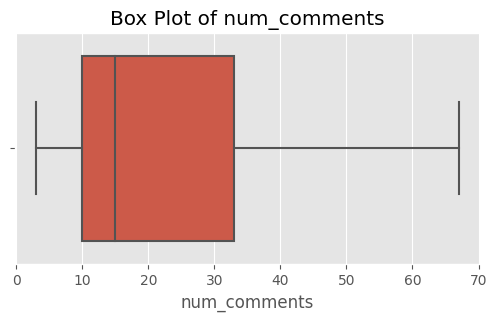

In [27]:
column_of_interest = 'num_comments'

# Remove outliers
df3 = remove_outliers(df2 , column_of_interest)

# Create and display the box plot
plot_box_plot(df3 , column_of_interest)


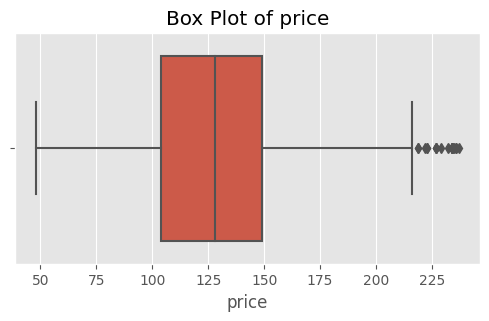

In [28]:
column_of_interest = 'price'

# Remove outliers
df4 = remove_outliers(df3 , column_of_interest)

# Create and display the box plot
plot_box_plot(df4 , column_of_interest)


Text(0.5, 0, 'Number of freqency')

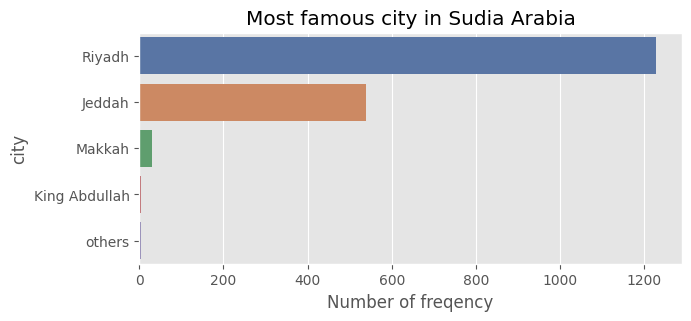

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
chains=df4['city'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous city in Sudia Arabia")
plt.xlabel("Number of freqency")

## [Rating distribution]()<a id="6"></a> <br>

/tmp/ipykernel_20/1086635873.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating,bins=20)


<Axes: xlabel='rate', ylabel='Density'>

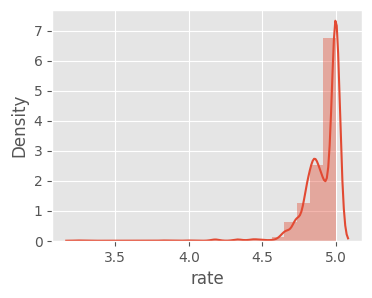

In [30]:
plt.figure(figsize=(4,3))
rating=df4['rate']
sns.distplot(rating,bins=20)

1. Almost more than 60 percent of place has rating between 4.5 and 5.
2. Place having rating less than 4 are very rare.

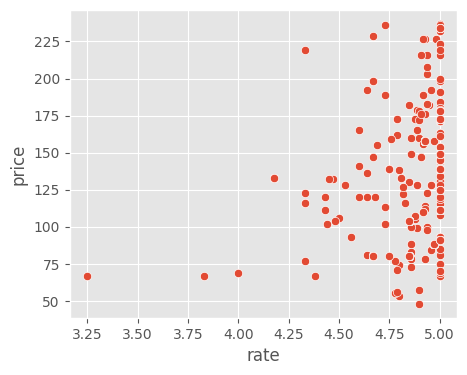

In [31]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="rate",y='price' , data = df4) #,hue='online_order',data=cost_dist)
plt.show()

In [32]:
df4['num_comments'].describe()

count    1813.000000
mean       17.605074
std        12.595446
min         3.000000
25%        10.000000
50%        15.000000
75%        27.000000
max        67.000000
Name: num_comments, dtype: float64

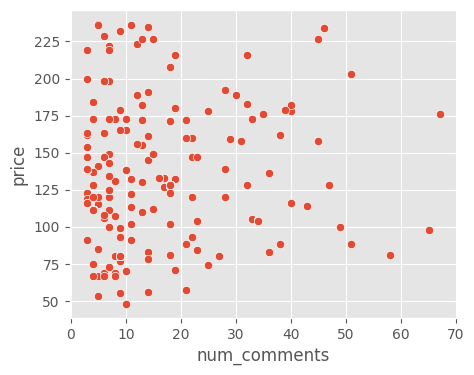

In [33]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="num_comments",y='price' , data = df4 ) #,hue='online_order',data=cost_dist)
plt.show()

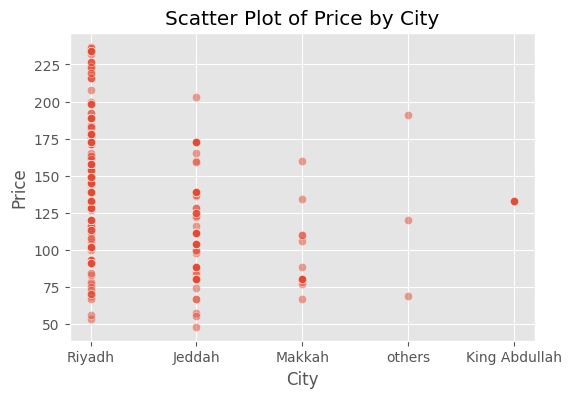

In [34]:
# Specify the columns you want to plot
x_column = 'city'
y_column = 'price'
# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df4[x_column], y=df4[y_column], alpha=0.5)
# Add labels and title
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Scatter Plot of Price by City')

# Show the plot
plt.show()

**we looking teh plot we sea the Riyadh has the heghest price**

### [Distribution of House priceing]()

/tmp/ipykernel_20/3800669170.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price'])


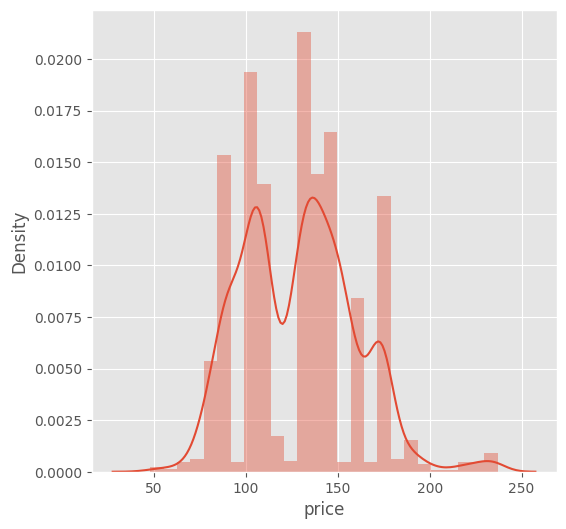

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(df4['price'])
plt.show()

In [36]:
df4_encoded = pd.get_dummies(df4, columns=['city'], prefix='city')

df4_encoded

,price,num_beds,num_bedrooms,rate,num_comments,city_Jeddah,city_King Abdullah,city_Makkah,city_Riyadh,city_others
2,162.0,2,2,5.00,3.0,False,False,False,True,False
7,176.0,2,2,4.93,67.0,False,False,False,True,False
9,105.0,3,2,4.88,33.0,False,False,False,True,False
11,182.0,1,1,4.85,13.0,False,False,False,False,False
15,57.0,1,1,4.90,21.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3592,139.0,4,2,5.00,3.0,False,False,False,True,False
3594,111.0,5,3,5.00,4.0,True,False,False,False,False
3595,91.0,3,2,5.00,11.0,False,False,False,True,False
3598,133.0,3,2,4.81,16.0,False,False,False,True,False


In [37]:
# df4 = pd.concat([ clean_data ,dummiess_city ],axis='columns')
# df4.head()

In [38]:
# Replace spaces with NaN
df4_encoded.replace(' ', pd.NA, inplace=True)
# Drop rows with any null values
df5  = df4_encoded.dropna()
# Display the cleaned DataFrame
print("DataFrame after removing rows with null values or spaces:")
print(df5)

DataFrame after removing rows with null values or spaces:
      price num_beds num_bedrooms  rate  num_comments  city_Jeddah  \
2     162.0        2            2  5.00           3.0        False   
7     176.0        2            2  4.93          67.0        False   
9     105.0        3            2  4.88          33.0        False   
11    182.0        1            1  4.85          13.0        False   
15     57.0        1            1  4.90          21.0         True   
...     ...      ...          ...   ...           ...          ...   
3592  139.0        4            2  5.00           3.0        False   
3594  111.0        5            3  5.00           4.0         True   
3595   91.0        3            2  5.00          11.0        False   
3598  133.0        3            2  4.81          16.0        False   
3599  173.0        1            1  5.00          10.0        False   

      city_King Abdullah  city_Makkah  city_Riyadh  city_others  
2                  False        Fal

In [39]:
df5

,price,num_beds,num_bedrooms,rate,num_comments,city_Jeddah,city_King Abdullah,city_Makkah,city_Riyadh,city_others
2,162.0,2,2,5.00,3.0,False,False,False,True,False
7,176.0,2,2,4.93,67.0,False,False,False,True,False
9,105.0,3,2,4.88,33.0,False,False,False,True,False
11,182.0,1,1,4.85,13.0,False,False,False,False,False
15,57.0,1,1,4.90,21.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3592,139.0,4,2,5.00,3.0,False,False,False,True,False
3594,111.0,5,3,5.00,4.0,True,False,False,False,False
3595,91.0,3,2,5.00,11.0,False,False,False,True,False
3598,133.0,3,2,4.81,16.0,False,False,False,True,False


In [40]:
import pandas as pd

# Assuming 'df12_cleaned' is your cleaned DataFrame
# This should be the DataFrame after removing rows with null values or spaces

# # Convert True/False to 1/0
# boolean_columns = ['Jeddah', 'King Abdullah', 'Makkah', 'Riyadh', 'others']
# df5[boolean_columns] = df5[boolean_columns].astype(int)

# # Delete the 'city' column
# df5.drop('city', axis=1, inplace=True)

# # Display the modified DataFrame
# print("DataFrame after converting True/False to 1/0 and deleting 'city' column:")
# print(df12_cleaned)


In [41]:
# # Check for null values
# null_values = df12.isnull().sum()

# # Display the columns with null values
# columns_with_null = null_values[null_values > 0]
# print("Columns with Null Values:")
# print(columns_with_null)

In [42]:
df5[['city_Jeddah', 'city_King Abdullah', 'city_Makkah', 'city_Riyadh', 'city_others']] = df5[['city_Jeddah', 'city_King Abdullah', 'city_Makkah', 'city_Riyadh', 'city_others']].astype(int)
df5

,price,num_beds,num_bedrooms,rate,num_comments,city_Jeddah,city_King Abdullah,city_Makkah,city_Riyadh,city_others
2,162.0,2,2,5.00,3.0,0,0,0,1,0
7,176.0,2,2,4.93,67.0,0,0,0,1,0
9,105.0,3,2,4.88,33.0,0,0,0,1,0
11,182.0,1,1,4.85,13.0,0,0,0,0,0
15,57.0,1,1,4.90,21.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3592,139.0,4,2,5.00,3.0,0,0,0,1,0
3594,111.0,5,3,5.00,4.0,1,0,0,0,0
3595,91.0,3,2,5.00,11.0,0,0,0,1,0
3598,133.0,3,2,4.81,16.0,0,0,0,1,0


In [43]:
df5['num_beds'] = df5['num_beds'].astype(int)
df5['num_bedrooms'] = df5['num_bedrooms'].astype(int)
df5.dtypes

price                 float64
num_beds                int64
num_bedrooms            int64
rate                  float64
num_comments          float64
city_Jeddah             int64
city_King Abdullah      int64
city_Makkah             int64
city_Riyadh             int64
city_others             int64
dtype: object

<Axes: >

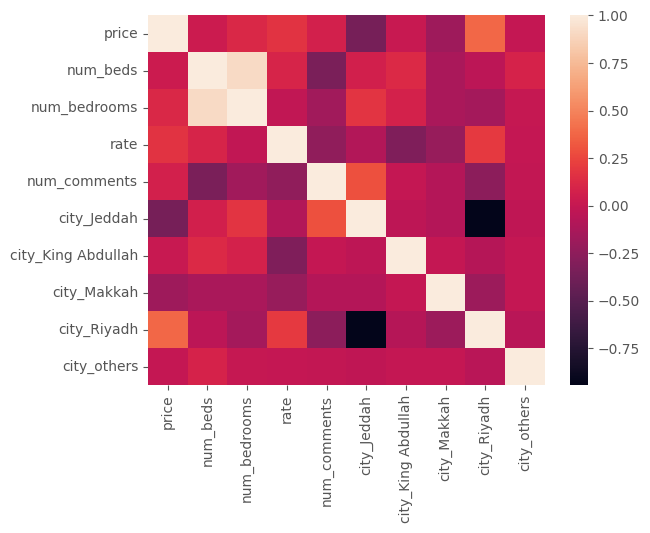

In [44]:
sns.heatmap(df5.corr()) 

In [45]:
# df5['bedrooms'] = df5['num_beds'] + df5['num_bedrooms']

In [46]:
X = df5.drop(['price'] , axis='columns')
X.head(3)

,num_beds,num_bedrooms,rate,num_comments,city_Jeddah,city_King Abdullah,city_Makkah,city_Riyadh,city_others
2,2,2,5.00,3.0,0,0,0,1,0
7,2,2,4.93,67.0,0,0,0,1,0
9,3,2,4.88,33.0,0,0,0,1,0


In [47]:
y = df5.price
y.head(3)

2    162.0
7    176.0
9    105.0
Name: price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test ,y_test)

0.34372437098785846

In [50]:
lr_clf.score(X_test ,y_test)

0.34372437098785846

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.26862231, 0.30619124, 0.37984988, 0.29686393, 0.25390208])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.301086,{}
1,lasso,0.191221,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.705424,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression:
Mean Squared Error: 572.9087369873265
R^2 Score: 0.34372437098785846

K-Nearest Neighbors:
Mean Squared Error: 169.96782369146004
R^2 Score: 0.8052992855519931

Decision Tree:
Mean Squared Error: 151.69872877251638
R^2 Score: 0.8262268102786364

Random Forest:
Mean Squared Error: 121.0298454133547
R^2 Score: 0.8613584803304393

XGBoost:
Mean Squared Error: 121.62595165356177
R^2 Score: 0.8606756316104021


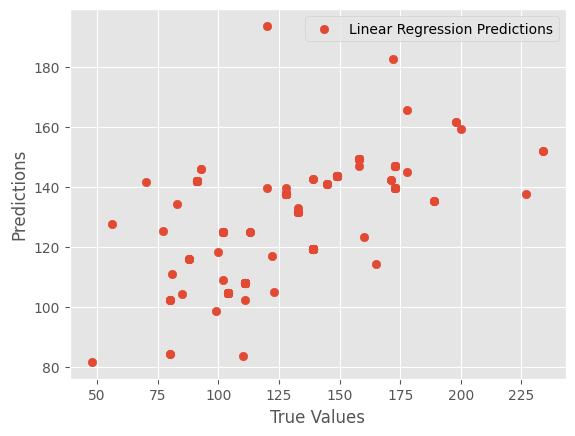

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Logistic Regression (for demonstration purposes; not suitable for regression)
# Note: Logistic Regression is typically used for classification problems
# For regression, consider other algorithms like Linear Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate performance
def evaluate_model(model, predictions, y_true):
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

# Evaluate Linear Regression
print("Linear Regression:")
evaluate_model(lr_model, lr_predictions, y_test)

# Evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
evaluate_model(knn_model, knn_predictions, y_test)

# Evaluate Decision Tree
print("\nDecision Tree:")
evaluate_model(dt_model, dt_predictions, y_test)

# Evaluate Random Forest
print("\nRandom Forest:")
evaluate_model(rf_model, rf_predictions, y_test)

# Evaluate XGBoost
print("\nXGBoost:")
evaluate_model(xgb_model, xgb_predictions, y_test)

# Optionally, plot predictions against true values
plt.scatter(y_test, lr_predictions, label='Linear Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


In [54]:
# Create and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 154.59680039786073
R^2 Score: 0.8229070253704039
